#### Listing 10.1 Bad naming conventions
Here we see some rather 'sinful' naming conventions.
1. short-hand variable names (usually used as placeholders during snippet testing within a REPL and do NOT belong in code.
2. an acronym 'code word' that might reference to some internal business logic or data source. This can make sense if you're querying some RDBMS system that was developed sometime before the 21st century and there is excessive abbreviations or acronyms for field names), but these do not belong in your code as variable names. It's impossible to read.
3. Usage of an abbreviation of reserved keyword. This is lazy and error-prone.
4. Usage of an actual language-reserved function name as a variable name. See below for what happens when we do this.

In order to prove a point about naming conventions with protected function names in Python, the below cell is designed to show what happens before the function value is overidden. 

In [1]:
gta = tuple([1,2,3,4])
gta

(1, 2, 3, 4)

In [2]:
import functools
import operator
import math

abc = list(range(100))
REF_IND_24G_88A = list(zip(abc, list(range(0, 500, 5))))
tuple = [math.pow(x[0] - x[1],2) for x in REF_IND_24G_88A]
rtrn = math.sqrt(functools.reduce(operator.add, tuple) / len(tuple))

In [3]:
rtrn

229.20732972573106

Ok, so that's an rmse score (not that we would know that by looking at the code at a quick glance). Considering the fact that we used the keyword 'tuple' as a variable definition, how does our context behave now, should we want to define a tuple again?

In [4]:
another_tuple = tuple([2,3,4])

TypeError: 'list' object is not callable

Whoops. Why did it work earlier, but now it doesn't?
> Python is an object-based language, and as such, everything (with exception of certain actually reserved keywords) can be overridden by a different type. In this case, since functions are handles as objects in Python, we can replace the tuple() function's object with our variable assignment of a list of floats. Naturally, passing a list into another list as an argument simply won't work. Hence, the exception that we see.

Let's illustrate what's going on below.

In [5]:
my_list = [1,2,3,4]

In [6]:
validating = my_list([2,3,4])

TypeError: 'list' object is not callable

In [7]:
%reset_selective -f [tuple]

In the above code block, we're showing the exact same exception in the same manner as before, just clearly elucidating what is actually going on.

#### Listing 10.2 Complex one-liner
Here's a style of code that I've seen too many people think is a good idea. I've been guilty of it myself when I was much more green at writing code. It usually comes from either one of two places:
1. An innocent lack of knowledge about how a computer processes code (thinking that if you reduce the number of variable declaration, the faster things will run). It's not how high-level languages work (with the exception of some particular data manipulation tasks where embedding functionality in a single traversal of a collection will be faster than scanning over it multiple times - but even in that case, you should be extracting that functionality to a function or a method to make the code easier to read and test).
2. Intentional complexity. This is usually the result of someone thinking that the more complex and condensed their code is, the smarter that they look. Nothing could be further from the truth. While neophyte programmers might see one-liners as something to admire ("Wow, this is SO complex and sophisticated!"), the reality is that experienced developers see elegance in simplicity. The easier your code is to read and the more clearly it is architected to AVOID COMPLEXITY, the better a coder you are seen as. If you feel like it's 'super cool' to write intentionally complex code, perhaps you should try to maintain someone else's code who sees this profession in the same light. You'll likely realize why so many people hate doing your PR's.

In [8]:
import math
import functools
import operator

rmse = math.sqrt(functools.reduce(operator.add, [math.pow(x[0] - x[1], 2) for x in list(zip(list(range(100)), list(range(0,500,5))))]) / 100)
rmse


229.20732972573106

#### Listing 10.3 Properly named and structured version
Here we're going to look at the first example in listing 9.5 and just rewrite it with better (and more clear) naming conventions. It's still not ideal (we'll get to that in listing 9.8), but it's definitely better than the earlier versions.

In [9]:
first_series_small = list(range(100))
larger_series_by_five = list(range(0, 500, 5))
merged_series_by_index = list(zip(first_series_small, larger_series_by_five))
merged_squared_errors = [math.pow(x[0] - x[1],2) for x in merged_series_by_index]
merged_rmse = math.sqrt(functools.reduce(operator.add, merged_squared_errors) / len(merged_squared_errors))
merged_rmse

229.20732972573106

#### Listing 10.4 How it should be written
Here we're going to calculate RMSE 'the right way'. If there exists a widely accepted package that does the calculation you're looking for without you having to maintain the code, that's a win-win. Is it as 'fun' to write code that just involves using a bunch of APIs? Depends on your definition of fun, I suppose. But if you're maintaining a massive code base that's filled with complex logic and custom unique algorithms, do you really want to add more complexity by re-implementing something that's standard?


In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_rmse_for_generated_sequences(**kwargs):
    first_sequence = np.arange(kwargs['seq_1_start'], kwargs['seq_1_stop'], kwargs['seq_1_step'], float)
    second_sequence = np.arange(kwargs['seq_2_start'], kwargs['seq_2_stop'], kwargs['seq_2_step'], float)
    return mean_squared_error(first_sequence, second_sequence, squared=False)

calculate_rmse_for_generated_sequences(**{'seq_1_start': 0, 'seq_1_stop': 100, 'seq_1_step': 1, 
                                        'seq_2_start': 0, 'seq_2_stop': 500, 'seq_2_step': 5})

229.20732972573106

By creating parameterized values for the generation of the series, we can leave the function alone while testing different values. Although this is a completely silly example, the principles hold true for all ML code:
> Stay away from hard-coded parameters as much as you can when writing functions and methods. If you need to change behavior, you want to be able to have a centralized location to change this behavior <i><b>through configuration rather than having to change source code to effect that change</b></i>.

Let's see what a few other values are for different parameters sequences...

In [11]:
calculate_rmse_for_generated_sequences(**{'seq_1_start': 0, 'seq_1_stop': 1000, 'seq_1_step': 2, 
                                        'seq_2_start': 500, 'seq_2_stop': 1000, 'seq_2_step': 1})

289.10811126635656

In [12]:
calculate_rmse_for_generated_sequences(**{'seq_1_start': -10000, 'seq_1_stop': 0, 'seq_1_step': 5, 
                                        'seq_2_start': 0, 'seq_2_stop': 2000, 'seq_2_step': 1})

6430.966956842493

#### Listing 10.5 Generating a logistic map series
In this section, focusing on tuple unpacking and how annoying (and confusing!) it can be for some ML use cases when we have a lot of information returning from the culmination of a number of co-related processing steps.
To begin to show what tuple unpacking is, let's first generate some data. Below is a tail recursive implementation of the logistic map series.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, recurrence):
    """ Logistic map function that applies the function to a passed-in float based on a set recurrence value
        :param x: float the prior value of the series (or seed value)
        :param recurrence: float the recurrence value for the logistic map to set the stability behavior of the series
    """
    return x * recurrence * (1 - x)

def log_map(n, x, r, collection=None):
    """ Tail recursive implementation of logistic map
        :param n: the number of recursive iterations to perform (size of the series to be generated)
        :param x: the seed value (for first iteration) and the recursive value to be 
                  manipulated for subsequent iterations
        :param r: the recurrence value that controls the behavior of the logistic map series
        :param collection: Python list for storing the generated series values of the logistic map
    """
    if collection is None:
        collection = []
    calculated_value = logistic_map(x, r)
    collection.append(calculated_value)
    if n > 0:
        log_map(n-1, calculated_value, r, collection)      
    return np.array(collection[:n])

def generate_log_map_and_plot(iterations, recurrence, start):
    """ Function for generating a logistic map series and a visual representation of the series over iterations
        :param iterations: total number of recursive iterations to generate the series
        :param recurrence: the logistic map recurrence value to control the behavior of the series
        :param start: seed value for the series
    """
    map_series = log_map(iterations, start, recurrence)
    with plt.style.context(style='seaborn'):
        fig = plt.figure(figsize=(16,8))
        ax = fig.add_subplot(111)
        ax.plot(range(iterations), map_series)
        ax.set_xlabel('iterations')
        ax.set_ylabel('logistic map values')
        ax.set_title('Logistic Map with recurrence of: {}'.format(recurrence))
    return (map_series, fig)

Let's take a look at one of the 'fun' (YMMV) recurrence values of the logistic map function: the accumulation point.

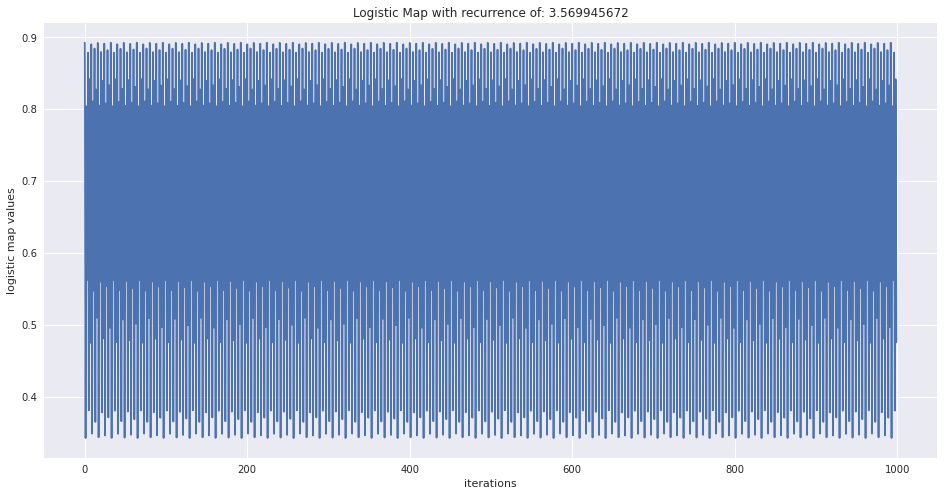

In [14]:
log_map_values_accumulation, log_map_plot = generate_log_map_and_plot(1000, 3.569945672, 0.5)

And let's see some other values (just for fun)

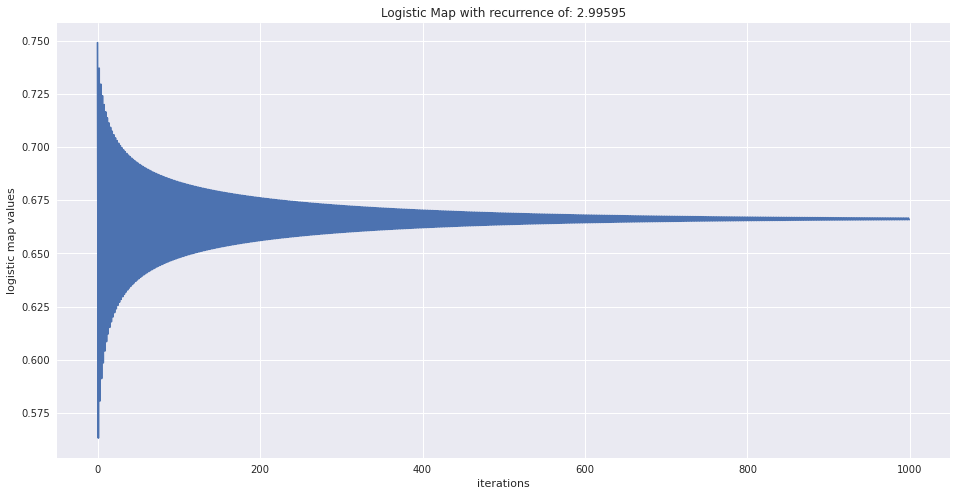

In [15]:
log_map_values_decay, log_map_plot_decay = generate_log_map_and_plot(1000, 2.99595, 0.5)

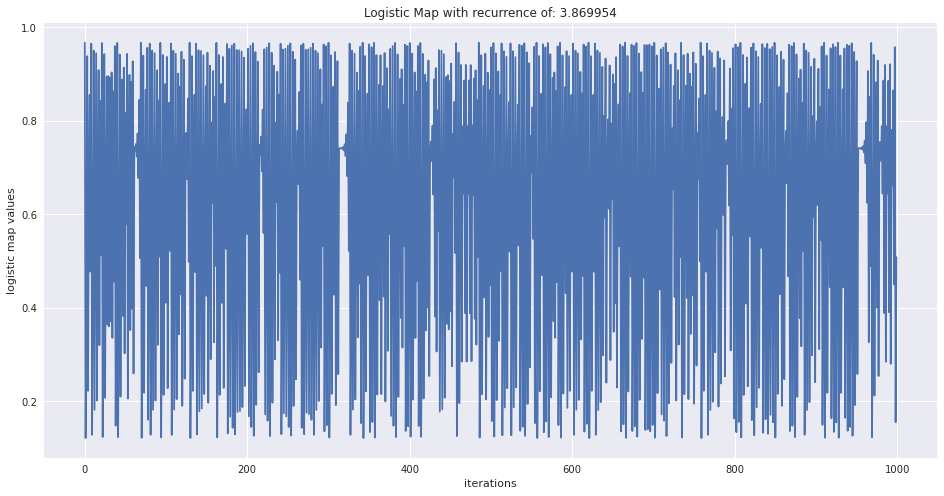

In [16]:
log_map_values_chaos, log_map_plot_chaos = generate_log_map_and_plot(1000, 3.869954, 0.5)

In each of the above examples, you can see that we're having to specify positional-specific references to the return values from the function. While this may not seem like much of a problem, what happens if we want to <b><i><u>add a new return to the signature?</u></i></b> We would have to update each place that we've called this function for the code to work properly again.

#### Listing 10.6 Statistical analysis function with a nightmarish tuple unpacking
Here we're looking at the worst-case scenario of a utility function. We're looking to pass in a single series of data and collect some statistics about it. Because there are so many attributes associated with what we're trying to calculate here, there are 3 main groups of analytics we've created, each of them a tuple within the larger outer tuple.

In [17]:
def analyze_series(series):
    """A statistical analysis utility function for calculating data metrics of a 1-dimensional series
       :param series: a numpy array of numeric types.
    """
    minimum = np.min(series)
    mean = np.average(series)
    maximum = np.max(series)
    q1 = np.quantile(series, 0.25)
    median = np.quantile(series, 0.5)
    q3 = np.quantile(series, 0.75)
    p5, p95 = np.percentile(series, [5, 95])
    std_dev = np.std(series)
    variance = np.var(series)
    return ((minimum, mean, maximum), (std_dev, variance), (p5, q1, median, q3, p95))

The return type above is pure, unadulterated nightmare-fuel. In order to access the return data, we can:

In [18]:
get_all_of_it = analyze_series(log_map_values_chaos)
get_all_of_it

((0.12172747725608367, 0.5935408729262835, 0.9674885),
 (0.2964432858377004, 0.08787862171825256),
 (0.12954481791157785,
  0.33211094455151413,
  0.6104050553104345,
  0.9051939411982387,
  0.965322993975222))

In [19]:
# ugh WHY
mean_of_chaos_series = get_all_of_it[0][1]
mean_of_chaos_series

0.5935408729262835

If you start seeing nonsense like that in your code, this is a massive code smell. Positional references like this when dealing with collections and structures that <u><i>you have generated for your own use</i></u> should be a warning to you to find a better way of doing it. The <b>biggest reason this is such a problem</b> is that eventually, this function will likely change. Perhaps someone comes in and updates it so that percentage values are placed in the first tuple in the collection, or they add a new calculation and put it before the mean by position. 
> When that happens, your code won't throw an exception; rather, it will <u>use the wrong data for further calculations</u>. While exceptions are annoying, they're at least helpful to prevent your code from doing something that you didn't intend. Using positional notation like this runs the risk of you calculating something incorrectly, giving you the wrong answer. This is, plainly, a <b><i>very bad thing indeed.</i></b>

Perhaps it would be better to have the user of this function define everything fully as unpacked values? Let's see what that looks like...

In [20]:
((minimum, mean, maximum), (std_dev, variance), (p5, q1, median, q3, p95)) = analyze_series(log_map_values_chaos)
mean

0.5935408729262835

Ok, that's just ridiculous. Who wants to write all of that boilerplate?!!
It also doesn't solve the problem of what happens if that function signature changes. Now there would have to be simply a different form of updating of everywhere that it's used. 

There's GOT to be a better way to do this.

#### Listing 10.7 Refactoring the series and plot generator with named tuples
Here we're going to use the named tuples function from the collections module to make currying of our return types a whole lot easier. In this first example it may not seem like much, but in listing 9.12 it will be clear as to why this is an improved way of handling data movement when working with complex return types.

In [21]:
from collections import namedtuple

def generate_log_map_and_plot_named(iterations, recurrence, start):
    map_series = log_map(iterations, start, recurrence)
    MapData = namedtuple('MapData', 'series plot')
    with plt.style.context(style='seaborn'):
        fig = plt.figure(figsize=(16,8))
        ax = fig.add_subplot(111)
        ax.plot(range(iterations), map_series)
        ax.set_xlabel('iterations')
        ax.set_ylabel('logistic map values')
        ax.set_title('Logistic Map with recurrence of: {}'.format(recurrence))
    return MapData(map_series, fig)

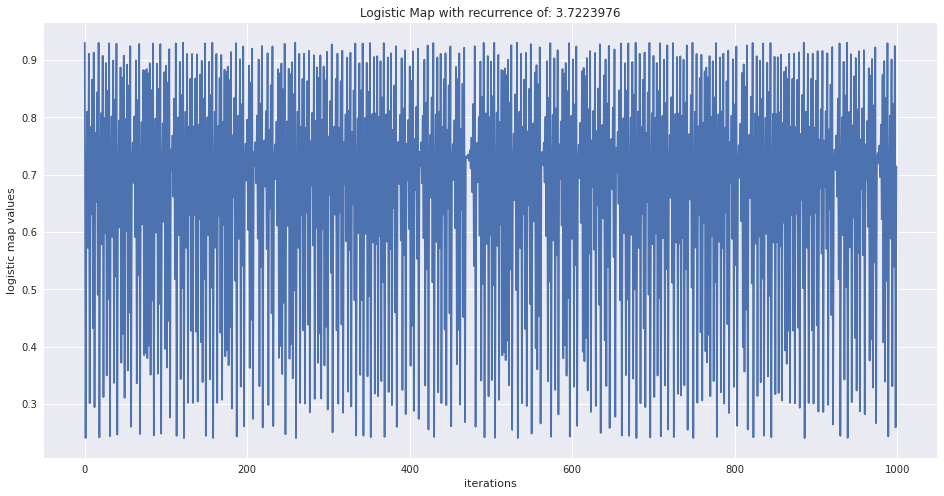

In [22]:
other_chaos_series = generate_log_map_and_plot_named(1000, 3.7223976, 0.5)

This is still a single return type, but instead of us having to refer to <i>positional notation</i> which is error-prone, confusing to read, and challenging to maintain, we can have named references based on the instance-scoped reference (the characteristics of the return type configuration is defined directly where the structure is used: within the function). This way, we have only a single place to change the structural relationship of the return values and their hierarchy, keeping our code far simpler and stable.

Let's see how we would access the return values below.

In [23]:
other_chaos_series.series

array([0.9305994 , 0.24040791, 0.67975427, 0.81032278, 0.57213166,
       0.91123186, 0.30109864, 0.78333483, 0.63177043, 0.86596575,
       0.43205522, 0.91341498, 0.29439719, 0.77324428, 0.65267612,
       0.84383032, 0.49054019, 0.93026629, 0.24147535, 0.68181299,
       0.80755197, 0.57850446, 0.90765845, 0.31199123, 0.7990227 ,
       0.59776279, 0.89502235, 0.34974659, 0.84656222, 0.48351944,
       0.92958836, 0.24364521, 0.6859717 , 0.80185852, 0.59141986,
       0.89948912, 0.33653616, 0.83113535, 0.52243619, 0.92872561,
       0.2464017 , 0.6912042 , 0.7945121 , 0.6077284 , 0.88739946,
       0.37194815, 0.86956222, 0.42220836, 0.90807317, 0.31073194,
       0.7972542 , 0.60168814, 0.89210803, 0.35828557, 0.85584257,
       0.45925477, 0.92441957, 0.26007657, 0.71632609, 0.75640244,
       0.68588074, 0.80198442, 0.59113688, 0.89968142, 0.3359641 ,
       0.83043796, 0.52415363, 0.92842776, 0.24735203, 0.69299505,
       0.79195093, 0.61331956, 0.88279889, 0.38513789, 0.88148

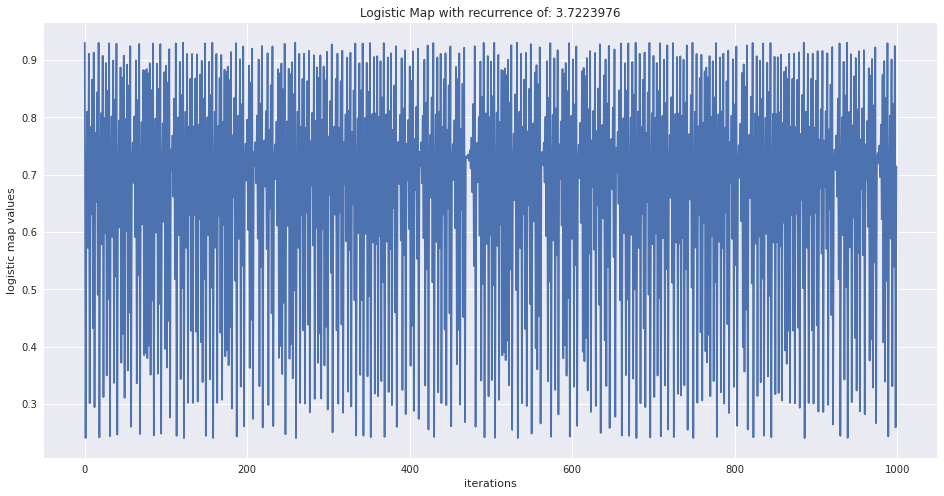

In [24]:
other_chaos_series.plot

Now that's a lot easier, right?

Just for fun, let's check out some interesting aspects of logistic map while we're here...

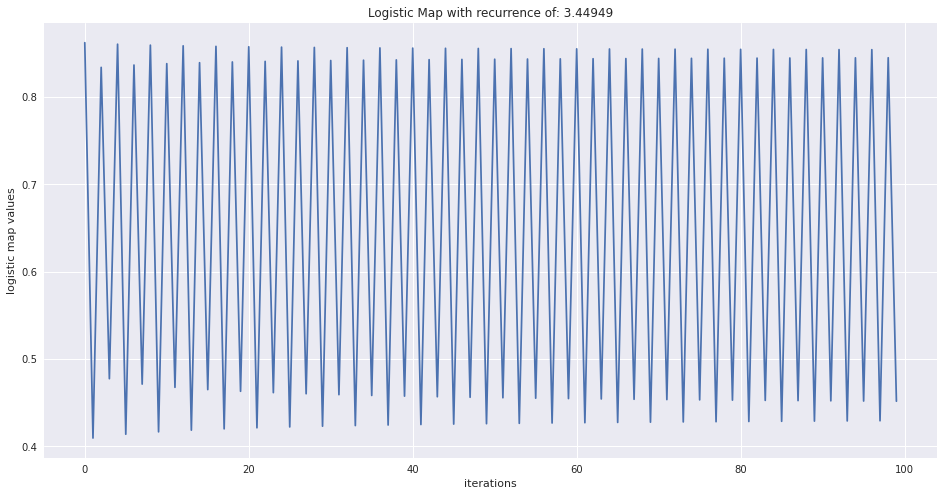

In [25]:
quad_cyle = generate_log_map_and_plot_named(100, 3.44949, 0.5)

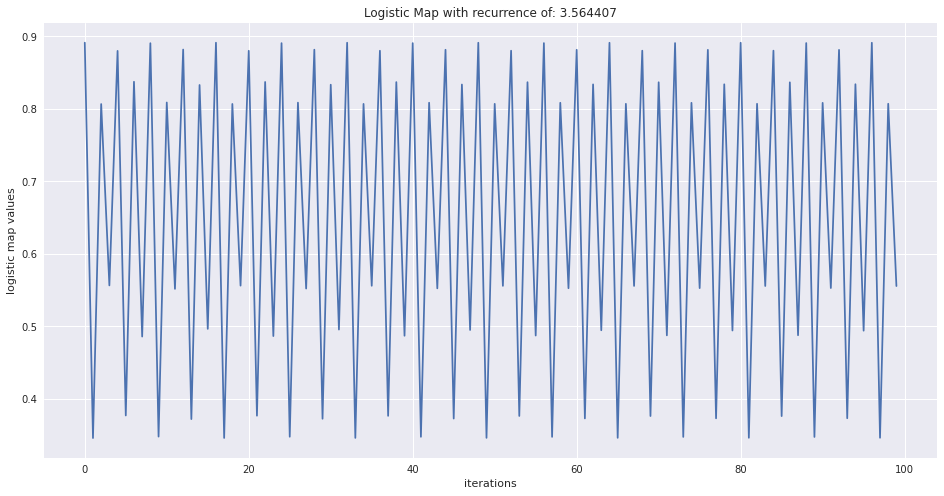

In [26]:
bi_cycle = generate_log_map_and_plot_named(100, 3.564407, 0.5)

In [27]:
bi_cycle.series

array([0.89110175, 0.34588799, 0.80644526, 0.55637293, 0.8797744 ,
       0.37701235, 0.83718666, 0.48584705, 0.89038778, 0.34787679,
       0.80861613, 0.55161366, 0.88160628, 0.37204086, 0.83273979,
       0.4964657 , 0.89105723, 0.34601212, 0.80658158, 0.55607506,
       0.87989378, 0.37668907, 0.83690286, 0.48652896, 0.89045492,
       0.34768992, 0.80841335, 0.55205965, 0.88144147, 0.37248911,
       0.83314796, 0.49549691, 0.89102947, 0.34608949, 0.80666649,
       0.55588945, 0.87996786, 0.37648845, 0.83672635, 0.48695276,
       0.89049498, 0.34757841, 0.80829223, 0.55232589, 0.88134241,
       0.37275844, 0.83339252, 0.49491586, 0.89100962, 0.34614484,
       0.80672721, 0.5557567 , 0.88002069, 0.37634534, 0.83660027,
       0.48725535, 0.8905228 , 0.34750097, 0.80820806, 0.55251085,
       0.88127329, 0.37294632, 0.83356282, 0.49451103, 0.89099436,
       0.34618737, 0.80677385, 0.55565472, 0.88006119, 0.37623562,
       0.83650351, 0.48748751, 0.8905437 , 0.34744278, 0.80814

#### Listing 10.8 Refactoring the statistical attribute function with named tuples
Here we're going to change the truly horrific signature that we had earlier with the statistical evaluation function. By converting this to namedtuples, we'll have a future-proof and far easier to access structure to deal with.

In [28]:
def analyze_series_legible(series):
    BasicStats = namedtuple('BasicStats', 'minimum mean maximum')
    Variation = namedtuple('Variation', 'std_dev variance')
    Quantiles = namedtuple('Quantiles', 'p5 q1 median q3 p95')
    Analysis = namedtuple('Analysis', ['basic_stats', 'variation', 'quantiles'])
    minimum = np.min(series)
    mean = np.average(series)
    maximum = np.max(series)
    q1 = np.quantile(series, 0.25)
    median = np.quantile(series, 0.5)
    q3 = np.quantile(series, 0.75)
    p5, p95 = np.percentile(series, [5, 95])
    std_dev = np.std(series)
    variance = np.var(series)
    return Analysis(BasicStats(minimum, mean, maximum), 
                    Variation(std_dev, variance), 
                    Quantiles(p5, q1, median, q3, p95))

In [29]:
legible_return_bi_cycle = analyze_series_legible(bi_cycle.series)

In [30]:
legible_return_bi_cycle.variation.std_dev

0.21570993929353727

In [31]:
legible_return_bi_cycle.basic_stats.mean

0.6476504853834991

And now we can combine these into a single utility function

In [32]:
from collections import namedtuple

def generate_log_map_and_plot_final(iterations, recurrence, start):
    map_series = log_map(iterations, start, recurrence)
    stats = analyze_series_legible(map_series)
    MapData = namedtuple('MapData', 'series plot stats')
    with plt.style.context(style='seaborn'):
        fig = plt.figure(figsize=(16,8))
        ax = fig.add_subplot(111)
        plus_one_sigma = stats.basic_stats.mean + stats.variation.std_dev
        minus_one_sigma = stats.basic_stats.mean - stats.variation.std_dev
        ax.plot(range(iterations), map_series, label='logistic map series')
        ax.axhline(y=stats.basic_stats.mean, color='g', linestyle='-', label='mean')
        ax.axhline(y=stats.quantiles.median, color='r', linestyle='--', label='median')
        ax.axhline(y=plus_one_sigma, color='orange', linestyle='--', label='+1 sigma')
        ax.axhline(y=minus_one_sigma, color='orange', linestyle='--', label='-1 sigma')
        ax.axhspan(minus_one_sigma, plus_one_sigma, alpha=0.1, color='orange', hatch='||')
        ax.set_xlabel('iterations')
        ax.set_ylabel('logistic map values')
        ax.set_title('Logistic Map with recurrence of: {}'.format(recurrence))
        ax.legend(loc='best')
    return MapData(map_series, fig, stats)

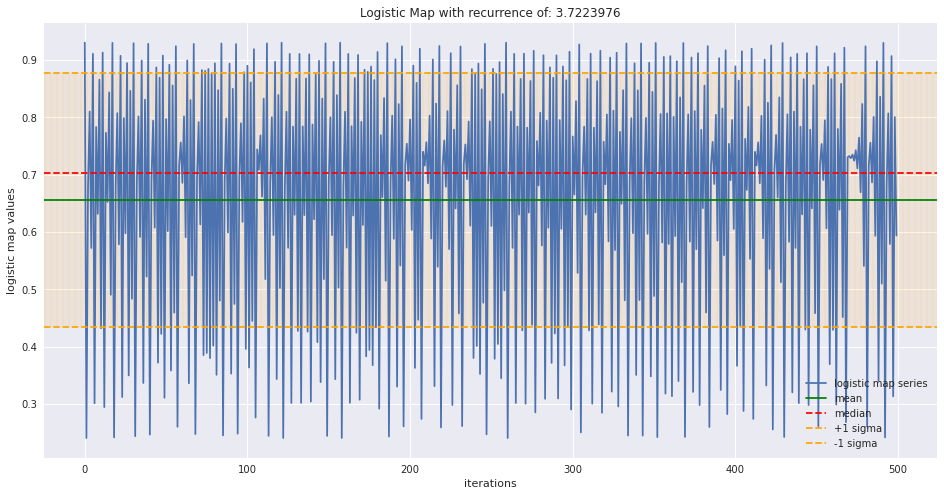

In [33]:
final_series = generate_log_map_and_plot_final(500, 3.7223976, 0.5)

In [34]:
final_series.stats

Analysis(basic_stats=BasicStats(minimum=0.24040790997121192, mean=0.6566275563139555, maximum=0.9305994), variation=Variation(std_dev=0.22155442965032812, variance=0.04908636529768219), quantiles=Quantiles(p5=0.2602061225203078, q1=0.4595280421323526, median=0.7032218512588247, q3=0.855739396254823, p95=0.9243785703994374))

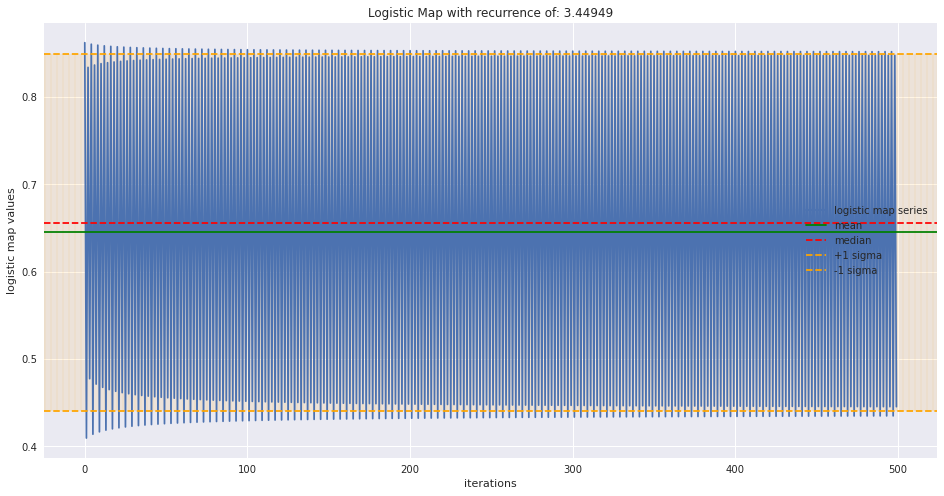

In [35]:
final_series_less_chaos = generate_log_map_and_plot_final(500, 3.44949, 0.5)

### Try / catch and Exception handling woes
Here we're going to move through an example of exception handling. We'll start with the worst possible way to do it (eat all the exceptions blindly), then build up the example to approach production-grade code design to ensure that our logic that we're defining in our code behaves the way that we expect for the use case at hand.

The very basic example we're going to do is pointlessly simple: diving a fixed number by a collection of other numbers. 

The basic logic:

In [36]:
import random
numbers = list(range(0, 100)) #alternatively: [x for x in range(0, 100)]
random.shuffle(numbers)

This gives us a randomly sorted collection of numbers from 0 to 99 inclusive. Next let's try to divide a number by each of those generated values, storing the results in a new list.

In [37]:
calculated = []
for i in numbers:
    calculated.append(10 / i)

ZeroDivisionError: division by zero

No surprise here. We can't divide by zero. 
This raises a Python Exception with the inheritance hierarchy below.
```
BaseException
  + Exception
    + ArithmeticError
      + ZeroDivisionError
```

#### Listing 10.9 A simple collection division function that will throw an Exception
Now, we should really put this logic inside a function that we can call. 

In [38]:
def divide_list(base, collection):
    output = []
    for i in collection:
        output.append(base / i)
    return output

In [39]:
blown_up = divide_list(100, numbers)

ZeroDivisionError: division by zero

#### Listing 10.10 Unsafe Exception handling example
Since we haven't handled the divide by zero exception, this function will blow up at runtime with that error if we pass in a zero as part of the collection attribute to the function. Let's handle that below in an amateurish way.

In [40]:
def divide_list_unsafe(base, collection):
    output = []
    for i in collection:
        try:
            output.append(base / i)
        except:
            pass
    return output

What we're doing above is catching <u><i><b>every. single. exception.</b></i></u> that can be thrown in Python. While it might, at first glance, seem like that's a safe thing to do (after all, we just want to calculate the division of a number by a collection of numbers. However, real-world code is very rarely ever this simple. There are typically a number of things that could have unexpected failures with how code is developed. By catching and ignoring (eating) all of the possible exceptions, we're blind to everything. 

For now, let's see what the output looks like when we use this function as it was intended.

#### Listing 10.11 Example of why blind exception handling is bad

In [41]:
unsafe = divide_list_unsafe(100, numbers)

In [42]:
len(unsafe)

99

So, that sort of worked as intended. It renders out the results, skipping over the 0 value (because the exception was caught and was told to 'just continue' with the 'pass' keyword.

However, we're blind to this failure. There is nothing that warns us that the list that we passed in effectively 'dropped' a value from the calculation.

The other critical issue, though, is that we're catching <i><b>everything</b></i>, not just the ZeroDivisionError that we were originally concerned with. To see what I'm talking about here, let's see what happens when we pass an invalid value to perform the division operation in this function.

In [43]:
broken = divide_list_unsafe('oops', numbers)

No exceptions were thrown, but clearly, we can't divide a string by a list of integers. So what happened here?

In [44]:
len(broken)

0

Well, we have <b>no idea at all</b> what went wrong. We know the list is empty on the return, but we weren't notified that the calculation couldn't continue since we captured everything and just blindly continued on.

> While this example is, frankly, pretty stupid, in 'real world' code, this is something that I've seen create bugs in code bases that can take <b>DAYS</b> to track down, where a particular function works fine in a dozen calls within the code but blows up in one place. Without any Exceptions being thrown, tracing the fault involves very time-consuming testing and validation of state while the program runs.

>> <b>You should <u>NEVER, EVER, EVER</u> blindly catch all exceptions. There is absolutely no use case where this is recommended, especially in ML code.</b>

How can we fix this?

By catching the exact exception that we're looking to catch.

#### Listing 10.12 Catching and handling a single exception safely

In [45]:
def divide_list_safer(base, collection):
    output = []
    for i in collection:
        try:
            output.append(base / i)
        except ZeroDivisionError as e:
            print("Couldn't divide {} by {} due to {}".format(base, i, e))
    return output

In [46]:
safer = divide_list_safer(100, numbers)
len(safer)

Couldn't divide 100 by 0 due to division by zero


99

In [47]:
safer_string = divide_list_safer('oops', numbers)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Now we have just the exception that we're looking to catch being caught and the string passing into that formula raises an exception that we most certainly wouldn't want to ignore.

But a print statement to stdout is only useful for debugging. It's completely useless for investigating a failure in a production system. For that, we need to implement some logging of these errors.

In [48]:
from importlib import reload
from datetime import datetime
import logging
import inspect

reload(logging)
log_file_name = 'ch9_01logs_{}.log'.format(datetime.now().date().strftime('%Y-%m-%d'))
logging.basicConfig(filename=log_file_name, level=logging.INFO)

The reload logic above is only required because Jupyter sets up a basic logging context when Jupyter starts. The above script will allow for the logger to be accessible for writing and reading from within this notebook environment.

There are a few more condititions that we may want to check for to make this implementation a bit more easy to debug.
1. We need to make sure that we're not dropping calculations from the passed-in collection.
2. We need to catch, log, and raise the type error for misuse of the function.
3. We need to log each of the divide by zero errors.

In [49]:
class CalculationError(ValueError):
    """ Custom Exception Class for having issues processing list division
       :param message: The error message to attach to this exception class
       :param pre: the count of elements in the passed-in collection
       :param post: the count of elements in the to-be-returned collection
       :param *args: custom parameter arguments for extending this exception class
    """
    def __init__(self, message, pre, post, *args):
        self.message = message
        self.pre = pre
        self.post = post
        super(CalculationError, self).__init__(message, pre, post, *args)

In [50]:
def divide_values_better(base, collection):
    function_nm = inspect.currentframe().f_code.co_name
    output = []
    for i in collection:
        try:
            output.append(base / i)
        except ZeroDivisionError as e:
            logging.error(
                "{} -{}- Couldn't divide {} by {} due to {} in {}".format(
                    datetime.now(), type(e), base, i, e, function_nm)
            )
        except TypeError as e:
            logging.error(
                "{} -{}- Couldn't process the base value '{}' ({}) in {}".format(
                datetime.now(), type(e), base, e, function_nm)
            )
            raise e
    input_len = len(collection)
    output_len = len(output)
    if input_len != output_len:
        msg = "The return size of the collection does not match passed in collection size."
        e = CalculationError(msg, input_len, output_len)
        logging.error("{} {} Input: {} Output: {} in {}".format(
            datetime.now(), e.message, e.pre, e.post, function_nm
        ))
        raise e
    return output

Now when we use this updated function, we should get an Exception thrown due to the mismatch in list length (because we're dropping one of the elements due to the divide by zero issue). Instead of it just spamming nonsense into stdout alone (where it won't be readily visible for troubleshooting of issues), though, it's going to write to the log file for the application.

In [51]:
better = divide_values_better(100, numbers)

CalculationError: ('The return size of the collection does not match passed in collection size.', 100, 99)

#### Listing 10.14 Logging results of caught and handled exceptions

In [52]:
def read_log(log_name):
    try:
        with open(log_name) as log:
            print(log.read())
    except FileNotFoundError as e:
        print("The log file is empty.")

In [53]:
read_log(log_file_name)

ERROR:root:2021-01-15 22:35:44.064225 -<class 'ZeroDivisionError'>- Couldn't divide 100 by 0 due to division by zero in divide_values_better
ERROR:root:2021-01-15 22:35:44.066967 The return size of the collection does not match passed in collection size. Input: 100 Output: 99 in divide_values_better



Now we can see what happened, when it happened, where it happened, and drill-down to the issues much more readily. In a sufficiently complex system, this can reduce troubleshooting of issues to minutes from days.

Let's take a look at what happens when we intentionally pass in bad data to this function and see what's recorded in the log.

In [54]:
garbage = divide_values_better('oops', numbers)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [55]:
read_log(log_file_name)

ERROR:root:2021-01-15 22:35:44.064225 -<class 'ZeroDivisionError'>- Couldn't divide 100 by 0 due to division by zero in divide_values_better
ERROR:root:2021-01-15 22:35:44.066967 The return size of the collection does not match passed in collection size. Input: 100 Output: 99 in divide_values_better
ERROR:root:2021-01-15 22:35:51.761806 -<class 'TypeError'>- Couldn't process the base value 'oops' (unsupported operand type(s) for /: 'str' and 'int') in divide_values_better



#### Listing 10.13 Final Implementation with proper exception handling and logging
How do we get it so that this won't be an issue for both the divide by zero AND the list length problems? Well, it depends on what is acceptable for the processing of this. If the position of values within the list is important, then we should probably put a placeholder into the list. If there is some aggregation that's being used, we don't need to do that, but should anticipate that the length of this list is variable and handle that properly in callee code. For the purposes of this example, we'll put a placeholder value in.

In [56]:
def divide_values_final(base, collection):
    function_nm = inspect.currentframe().f_code.co_name
    output = []
    for i in collection:
        try:
            output.append(base / i)
        except ZeroDivisionError as e:
            logging.error(
                "{} -{}- Applied Placeholder value '0' for dividing {} by {} due to {} in {}".format(
                    datetime.now(), type(e), base, i, e, function_nm)
            )
            output.append(0.0)
        except TypeError as e:
            logging.error(
                "{} -{}- Couldn't process the base value '{}' ({}) in {}".format(
                datetime.now(), type(e), base, e, function_nm)
            )
            raise e
    input_len = len(collection)
    output_len = len(output)
    if input_len != output_len:
        msg = "The return size of the collection does not match passed in collection size."
        e = CalculationError(msg, input_len, output_len)
        logging.error("{} {} Input: {} Output: {} in {}".format(
            datetime.now(), e.message, e.pre, e.post, function_nm
        ))
        raise e
    return output

In [57]:
placeholder = divide_values_final(100, numbers)
len(placeholder)

100

Now, even though this now passes, we still have a place that we can see that <i>SOMETHING</i> went wrong with the calculation (to aid troubleshooting in the future) and that we had to add a placeholder value due to the divide by zero problem. It's written to the logs. Let's take a look at that.

In [58]:
read_log(log_file_name)

ERROR:root:2021-01-15 22:35:44.064225 -<class 'ZeroDivisionError'>- Couldn't divide 100 by 0 due to division by zero in divide_values_better
ERROR:root:2021-01-15 22:35:44.066967 The return size of the collection does not match passed in collection size. Input: 100 Output: 99 in divide_values_better
ERROR:root:2021-01-15 22:35:51.761806 -<class 'TypeError'>- Couldn't process the base value 'oops' (unsupported operand type(s) for /: 'str' and 'int') in divide_values_better
ERROR:root:2021-01-15 22:35:57.856356 -<class 'ZeroDivisionError'>- Applied Placeholder value '0' for dividing 100 by 0 due to division by zero in divide_values_final



### Section 9.2.4 Use of global mutable objects

#### Listing 10.15 An example utility function for maintaining a list of elements

In [59]:
def features_to_add_to_vector(features, feature_collection=[]):
    [feature_collection.append(x) for x in features]
    return feature_collection

#### Listing 10.16 Usage of the simple listing function

In [60]:
trial_1 = features_to_add_to_vector(['a', 'b', 'c'])
trial_1

['a', 'b', 'c']

#### Listing 10.17 Object state mutation by repeated calls to our function

In [61]:
trial_2 = features_to_add_to_vector(['d', 'e', 'f'])
trial_2

['a', 'b', 'c', 'd', 'e', 'f']

Huh? What the heck? Why does trial_2 have 'a', 'b', and 'c' in it? What is going on here?!
Let's take a look at the state of trial_1 again..

In [62]:
trial_1

['a', 'b', 'c', 'd', 'e', 'f']

Ok, that might be a problem. What the end-user doesn't know is that in order to have a new collection created, they would have to specify that a new empty list would need to be passed in to get the correctly functionality. This is both complex and odd to expect that sort of functionality with a default value provided for one of the arguments.

In [63]:
trial_3 = features_to_add_to_vector(['g', 'h', 'i'], [])
trial_3

['g', 'h', 'i']

What if we're calling this function multiple times throughout our code in the future? What would the final state of this be?

In [64]:
trial_4 = features_to_add_to_vector(['a', 'b', 'c'])
for i in range(0,10):
    features_to_add_to_vector(['z', 'y', 'x'])
trial_4

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'a',
 'b',
 'c',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x']

clearly, this is unusable in this state. However, even though this is a very silly example (why would we want to pass a list into creating another list?), there are countless examples that I've seen of very similar bugs like this in Python code bases. The use of global functions instead of class-scoped methods, when accessing functions, state from initilization is preserved unless specifically overridden. 

These sorts of bugs can be very challenging to track down if the code base is sufficiently complex and large. 

#### Listing 10.18 A fixed implementation for the utility function

In [65]:
def features_to_add_to_vector_updated(features, feature_collection=None):
    collection = feature_collection if feature_collection else list()
    [collection.append(x) for x in features]
    return collection

In [66]:
trial_1a = features_to_add_to_vector_updated(['a', 'b', 'c'])
trial_1a

['a', 'b', 'c']

In [67]:
trial_2a = features_to_add_to_vector_updated(['d', 'e', 'f'])
trial_2a

['d', 'e', 'f']

In [68]:
trial_1a

['a', 'b', 'c']

That's a bit better! We forced Python to create a new list each time if we didn't explicitly pass in a pre-existing list as the 2nd argument to the function.

### Section 9.2.5 Excessively nested logic

Let's take a look at a common scenario in ML code bases: the introduction of business logic to transform the raw output from a prediction algorithm to something that meets within the confines of the business.

Let's suppose that we have an ensemble of two models that, for each of our users, generates two probabilities. What we need to do is to map these raw probability scores to an overall score metric that the business needs to use to make a decision. 

Let's start off by creating a very simple generator for our data.

#### Listing 10.19 Generating our synthetic probability data for our ensemble approach

In [69]:
def generate_scores(number, seed=42):
    def get_random():
        return random.uniform(0.0, 1.0)
    random.seed(seed)
    return [(get_random(), get_random()) for x in range(number)]

In [70]:
generated_probabilities = generate_scores(100)
generated_probabilities

[(0.6394267984578837, 0.025010755222666936),
 (0.27502931836911926, 0.22321073814882275),
 (0.7364712141640124, 0.6766994874229113),
 (0.8921795677048454, 0.08693883262941615),
 (0.4219218196852704, 0.029797219438070344),
 (0.21863797480360336, 0.5053552881033624),
 (0.026535969683863625, 0.1988376506866485),
 (0.6498844377795232, 0.5449414806032167),
 (0.2204406220406967, 0.5892656838759087),
 (0.8094304566778266, 0.006498759678061017),
 (0.8058192518328079, 0.6981393949882269),
 (0.3402505165179919, 0.15547949981178155),
 (0.9572130722067812, 0.33659454511262676),
 (0.09274584338014791, 0.09671637683346401),
 (0.8474943663474598, 0.6037260313668911),
 (0.8071282732743802, 0.7297317866938179),
 (0.5362280914547007, 0.9731157639793706),
 (0.3785343772083535, 0.552040631273227),
 (0.8294046642529949, 0.6185197523642461),
 (0.8617069003107772, 0.577352145256762),
 (0.7045718362149235, 0.045824383655662215),
 (0.22789827565154686, 0.28938796360210717),
 (0.0797919769236275, 0.232790886361

Now, the business rules are such that there are 5 separate ranges for these probabilities. Based on their ranges, they would like to combine these values into an ordinal metric score. 

How many would approach mapping this hierarchical logic to continuous values would be through a set of if/elif/else statements as shown below.

#### Listing 10.20 Consolidation logic by way of if, elif, and else statements

In [71]:
def master_score(prob1, prob2):
    if prob1 < 0.2:
        if prob2 < 0.2:
            return (0, (prob1, prob2))
        elif prob2 < 0.4:
            return (1, (prob1, prob2))
        elif prob2 < 0.6:
            return (2, (prob1, prob2))
        elif prob2 < 0.8:
            return (3, (prob1, prob2))
        else:
            return (4, (prob1, prob2))
    elif prob1 < 0.4:
        if prob2 < 0.2:
            return (1, (prob1, prob2))
        elif prob2 < 0.4:
            return (2, (prob1, prob2))
        elif prob2 < 0.6:
            return (3, (prob1, prob2))
        elif prob2 < 0.8:
            return (4, (prob1, prob2))
        else:
            return (5, (prob1, prob2))
    elif prob1 < 0.6:
        if prob2 < 0.2:
            return (2, (prob1, prob2))
        elif prob2 < 0.4:
            return (3, (prob1, prob2))
        elif prob2 < 0.6:
            return (4, (prob1, prob2))
        elif prob2 < 0.8:
            return (5, (prob1, prob2))
        else:
            return (6, (prob1, prob2))
    elif prob1 < 0.8:
        if prob2 < 0.2:
            return (3, (prob1, prob2))
        elif prob2 < 0.4:
            return (4, (prob1, prob2))
        elif prob2 < 0.6:
            return (5, (prob1, prob2))
        elif prob2 < 0.8:
            return (6, (prob1, prob2))
        else:
            return (7, (prob1, prob2))
    else:
        if prob2 < 0.2:
            return (4, (prob1, prob2))
        elif prob2 < 0.4:
            return (5, (prob1, prob2))
        elif prob2 < 0.6:
            return (6, (prob1, prob2))
        elif prob2 < 0.8:
            return (7, (prob1, prob2))
        else:
            return (8, (prob1, prob2))

def apply_scores(probabilities):
    final_scores = []
    for i in probabilities:
        final_scores.append(master_score(i[0], i[1]))
    return final_scores

And if we were to run this against our generated data, we would get...

In [72]:
scored_data = apply_scores(generated_probabilities)
scored_data

[(3, (0.6394267984578837, 0.025010755222666936)),
 (2, (0.27502931836911926, 0.22321073814882275)),
 (6, (0.7364712141640124, 0.6766994874229113)),
 (4, (0.8921795677048454, 0.08693883262941615)),
 (2, (0.4219218196852704, 0.029797219438070344)),
 (3, (0.21863797480360336, 0.5053552881033624)),
 (0, (0.026535969683863625, 0.1988376506866485)),
 (5, (0.6498844377795232, 0.5449414806032167)),
 (3, (0.2204406220406967, 0.5892656838759087)),
 (4, (0.8094304566778266, 0.006498759678061017)),
 (7, (0.8058192518328079, 0.6981393949882269)),
 (1, (0.3402505165179919, 0.15547949981178155)),
 (5, (0.9572130722067812, 0.33659454511262676)),
 (0, (0.09274584338014791, 0.09671637683346401)),
 (7, (0.8474943663474598, 0.6037260313668911)),
 (7, (0.8071282732743802, 0.7297317866938179)),
 (6, (0.5362280914547007, 0.9731157639793706)),
 (3, (0.3785343772083535, 0.552040631273227)),
 (7, (0.8294046642529949, 0.6185197523642461)),
 (6, (0.8617069003107772, 0.577352145256762)),
 (3, (0.7045718362149235, 

This is all well and good (sort of) for most people. However, it's time-consuming, error-prone, and mind-numbing to create chained logic in this manner. 

Can we make it better? Easier to read? More extensible?

A Python developer might think of something a bit more concise using dictionary references that can be externalized to the core scoring code, as shown below.

#### Listing 10.21 A dictionary-based configuration approach to handling business logic

In [73]:
threshold_dict = {
    '<0.2': 'low',
    '<0.4': 'low_med',
    '<0.6': 'med',
    '<0.8': 'med_high',
    '<1.0': 'high'
}

match_dict = {
    ('low', 'low'): 0,
    ('low', 'low_med'): 1,
    ('low', 'med'): 2,
    ('low', 'med_high'): 3,
    ('low', 'high'): 4,
    ('low_med', 'low'): 1,
    ('low_med', 'low_med'): 2,
    ('low_med', 'med'): 3,
    ('low_med', 'med_high'): 4,
    ('low_med', 'high'): 5,
    ('med', 'low'): 2,
    ('med', 'low_med'): 3,
    ('med', 'med'): 4,
    ('med', 'med_high'): 5,
    ('med', 'high'): 6,
    ('med_high', 'low'): 3,
    ('med_high', 'low_med'): 4,
    ('med_high', 'med'): 5,
    ('med_high', 'med_high'): 6,
    ('med_high', 'high'): 7,
    ('high', 'low'): 4,
    ('high', 'low_med'): 5,
    ('high', 'med'): 6,
    ('high', 'med_high'): 7,
    ('high', 'high'): 8
}

In [74]:
def adjudicate_individual(value):
    if value < 0.2: return threshold_dict['<0.2']
    elif value < 0.4: return threshold_dict['<0.4']
    elif value < 0.6: return threshold_dict['<0.6']
    elif value < 0.8: return threshold_dict['<0.8']
    else: return threshold_dict['<1.0']

def adjudicate_pair(pair):
    return match_dict[(adjudicate_individual(pair[0]), adjudicate_individual(pair[1]))]

def evaluate_raw_scores(scores):
    return [(adjudicate_pair(x), x) for x in scores]

This is still a bit onerous since we have to keep track of all of those mappings and maintain a configuration class that holds all of them.

In [75]:
dev_way = evaluate_raw_scores(generated_probabilities)
dev_way

[(3, (0.6394267984578837, 0.025010755222666936)),
 (2, (0.27502931836911926, 0.22321073814882275)),
 (6, (0.7364712141640124, 0.6766994874229113)),
 (4, (0.8921795677048454, 0.08693883262941615)),
 (2, (0.4219218196852704, 0.029797219438070344)),
 (3, (0.21863797480360336, 0.5053552881033624)),
 (0, (0.026535969683863625, 0.1988376506866485)),
 (5, (0.6498844377795232, 0.5449414806032167)),
 (3, (0.2204406220406967, 0.5892656838759087)),
 (4, (0.8094304566778266, 0.006498759678061017)),
 (7, (0.8058192518328079, 0.6981393949882269)),
 (1, (0.3402505165179919, 0.15547949981178155)),
 (5, (0.9572130722067812, 0.33659454511262676)),
 (0, (0.09274584338014791, 0.09671637683346401)),
 (7, (0.8474943663474598, 0.6037260313668911)),
 (7, (0.8071282732743802, 0.7297317866938179)),
 (6, (0.5362280914547007, 0.9731157639793706)),
 (3, (0.3785343772083535, 0.552040631273227)),
 (7, (0.8294046642529949, 0.6185197523642461)),
 (6, (0.8617069003107772, 0.577352145256762)),
 (3, (0.7045718362149235, 

What happens when we have two additional models to add later on?

How many levels and rows of text will we have to create for 4 probabilities with 5 groups?

#### Listing 10.22 A function to calculate just how many lines of code we'd have to write

In [76]:
import math
def how_many_terrible_lines(levels):
    return ((5**levels) * 2) + math.factorial(levels)

In [77]:
how_many_terrible_lines(4)

1274

How about for 8 probabilities?!

In [78]:
how_many_terrible_lines(8)

821570

right. ok. So, that's not going to work.

Even with the 'developer' approach, we would be looking at a tuple-keyed dictionary for lookup purposes that would be...

In [79]:
8**5

32768

#### Listing 10.23 A better solution that effortlessly scales

But we can get rid of this very simply by doing our assignments in such a way that maps them to the numeric equivalents directly.

In [80]:
def generate_scores_updated(number, elements, seed=42):
    def get_random():
        return random.uniform(0.0, 1.0)
    random.seed(seed)
    return [tuple(get_random() for y in range(elements)) for x in range(number)]

In [81]:
larger_probabilities = generate_scores_updated(100, 8)
larger_probabilities

[(0.6394267984578837,
  0.025010755222666936,
  0.27502931836911926,
  0.22321073814882275,
  0.7364712141640124,
  0.6766994874229113,
  0.8921795677048454,
  0.08693883262941615),
 (0.4219218196852704,
  0.029797219438070344,
  0.21863797480360336,
  0.5053552881033624,
  0.026535969683863625,
  0.1988376506866485,
  0.6498844377795232,
  0.5449414806032167),
 (0.2204406220406967,
  0.5892656838759087,
  0.8094304566778266,
  0.006498759678061017,
  0.8058192518328079,
  0.6981393949882269,
  0.3402505165179919,
  0.15547949981178155),
 (0.9572130722067812,
  0.33659454511262676,
  0.09274584338014791,
  0.09671637683346401,
  0.8474943663474598,
  0.6037260313668911,
  0.8071282732743802,
  0.7297317866938179),
 (0.5362280914547007,
  0.9731157639793706,
  0.3785343772083535,
  0.552040631273227,
  0.8294046642529949,
  0.6185197523642461,
  0.8617069003107772,
  0.577352145256762),
 (0.7045718362149235,
  0.045824383655662215,
  0.22789827565154686,
  0.28938796360210717,
  0.07979

What would this look like for the naive way of handling the conditional logic?

In [82]:
# def master_score_updated(prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8):
#     if prob1 < 0.2:
#         if prob2 < 0.2:
#             if prob3 < 0.2:
#                 if prob4 < 0.2:
#                     if prob5 < 0.2:
#                         if prob6 < 0.2:
#                             if prob7 < 0.2:
#                                 if prob8 < 0.2:
#                                     return (0, (prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8))
#         elif prob2 < 0.4:
#             if prob3 < 0.2:
#                 if prob4 < 0.2:
#                     if prob5 < 0.2:
#                         if prob6 < 0.2:
#                             if prob7 < 0.2:
#                                 if prob8 < 0.2:
#                                     return (1, (prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8))
#         ... 821,553 more lines of this nonsense...

This is just pure insanity.

Let's see if we can make this logic a bit better, though.

In [83]:
def updated_adjudication(value):
    if value < 0.2 : return 0
    elif value < 0.4: return 1
    elif value < 0.6: return 2
    elif value < 0.8: return 3
    else: return 4

def score_larger(scores):
    return sum(updated_adjudication(x) for x in scores)

def evaluate_larger_scores(probs):
    return [(score_larger(x), x) for x in probs]

In [84]:
simpler_solution = evaluate_larger_scores(larger_probabilities)
simpler_solution

[(15,
  (0.6394267984578837,
   0.025010755222666936,
   0.27502931836911926,
   0.22321073814882275,
   0.7364712141640124,
   0.6766994874229113,
   0.8921795677048454,
   0.08693883262941615)),
 (10,
  (0.4219218196852704,
   0.029797219438070344,
   0.21863797480360336,
   0.5053552881033624,
   0.026535969683863625,
   0.1988376506866485,
   0.6498844377795232,
   0.5449414806032167)),
 (15,
  (0.2204406220406967,
   0.5892656838759087,
   0.8094304566778266,
   0.006498759678061017,
   0.8058192518328079,
   0.6981393949882269,
   0.3402505165179919,
   0.15547949981178155)),
 (19,
  (0.9572130722067812,
   0.33659454511262676,
   0.09274584338014791,
   0.09671637683346401,
   0.8474943663474598,
   0.6037260313668911,
   0.8071282732743802,
   0.7297317866938179)),
 (22,
  (0.5362280914547007,
   0.9731157639793706,
   0.3785343772083535,
   0.552040631273227,
   0.8294046642529949,
   0.6185197523642461,
   0.8617069003107772,
   0.577352145256762)),
 (7,
  (0.7045718362149235

The other bonus to this is that we don't have to change the code at all for this business logic (unless we needed to scale the values, but that would be a trivial one-time update). To demonstrate, let's see what happens if we have 100 probabilties...

In [85]:
ridiculous_ensemble = generate_scores_updated(100, 100)
ridiculous_ensemble

[(0.6394267984578837,
  0.025010755222666936,
  0.27502931836911926,
  0.22321073814882275,
  0.7364712141640124,
  0.6766994874229113,
  0.8921795677048454,
  0.08693883262941615,
  0.4219218196852704,
  0.029797219438070344,
  0.21863797480360336,
  0.5053552881033624,
  0.026535969683863625,
  0.1988376506866485,
  0.6498844377795232,
  0.5449414806032167,
  0.2204406220406967,
  0.5892656838759087,
  0.8094304566778266,
  0.006498759678061017,
  0.8058192518328079,
  0.6981393949882269,
  0.3402505165179919,
  0.15547949981178155,
  0.9572130722067812,
  0.33659454511262676,
  0.09274584338014791,
  0.09671637683346401,
  0.8474943663474598,
  0.6037260313668911,
  0.8071282732743802,
  0.7297317866938179,
  0.5362280914547007,
  0.9731157639793706,
  0.3785343772083535,
  0.552040631273227,
  0.8294046642529949,
  0.6185197523642461,
  0.8617069003107772,
  0.577352145256762,
  0.7045718362149235,
  0.045824383655662215,
  0.22789827565154686,
  0.28938796360210717,
  0.0797919769

In [ ]:
ridiculous_eval = evaluate_larger_scores(ridiculous_ensemble)
ridiculous_eval